In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

F:\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
client_df = pd.read_csv('client_data (1).csv')
price_df = pd.read_csv('price_data (1).csv')


In [4]:
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [5]:
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [28]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
client_df.describe().T

count           mean            std  min  \
cons_12m                        14606.0  159220.286252  573465.264198  0.0   
cons_gas_12m                    14606.0   28092.375325  162973.059057  0.0   
cons_last_month                 14606.0   16090.269752   64364.196422  0.0   
forecast_cons_12m               14606.0    1868.614880    2387.571531  0.0   
forecast_cons_year              14606.0    1399.762906    3247.786255  0.0   
forecast_discount_energy        14606.0       0.966726       5.108289  0.0   
forecast_meter_rent_12m         14606.0      63.086871      66.165783  0.0   
forecast_price_energy_off_peak  14606.0       0.137283       0.024623  0.0   
forecast_price_energy_peak      14606.0       0.050491       0.049037  0.0   
forecast_price_pow_off_peak     14606.0      43.130056       4.485988  0.0   
imp_cons                        14606.0     152.786896     341.369366  0.0   
margin_gross_pow_ele            14606.0      24.565121      20.231172  0.0   
margin_net_pow_ele              14606.0      24.562517      20.230280  0.0   
nb_prod_act                     14606.0       1.292346       0.709774  1.0   
net_margin                      14606.0     189.264522     311.798130  0.0   
num_years_antig                 14606.0       4.997809       1.611749  1.0   
pow_max                         14606.0      18.135136      13.534743  3.3   
churn                           14606.0       0.097152       0.296175  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.750000  14115.500000  40763.750000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    792.500000   3383.000000   
forecast_cons_12m                494.995000   1112.875000   2401.790000   
forecast_cons_year                 0.000000    314.000000   1745.750000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.795000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   
imp_cons                           0.000000     37.395000    193.980000   
margin_gross_pow_ele              14.280000     21.640000     29.880000   
margin_net_pow_ele                14.280000     21.640000     29.880000   
nb_prod_act                        1.000000      1.000000      1.000000   
net_margin                        50.712500    112.530000    243.097500   
num_years_antig                    4.000000      5.000000      6.000000   
pow_max                           12.500000     13.856000     19.172500   
churn                              0.000000      0.000000      0.000000   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01  
imp_cons                        1.504279e+04  
margin_gross_pow_ele            3.746400e+02  
margin_net_pow_ele              3.746400e+02  
nb_prod_act                     3.200000e+01  
net_margin                      2.457065e+04  
num_years_antig                 1.300000e+01  
pow_max                         3.200000e+02  
churn                           1.000000e+00

In [9]:
price_df.describe().T

count       mean        std  min        25%        50%  \
price_off_peak_var  193002.0   0.141027   0.025032  0.0   0.125976   0.146033   
price_peak_var      193002.0   0.054630   0.049924  0.0   0.000000   0.085483   
price_mid_peak_var  193002.0   0.030496   0.036298  0.0   0.000000   0.000000   
price_off_peak_fix  193002.0  43.334477   5.410297  0.0  40.728885  44.266930   
price_peak_fix      193002.0  10.622875  12.841895  0.0   0.000000   0.000000   
price_mid_peak_fix  193002.0   6.409984   7.773592  0.0   0.000000   0.000000   

                          75%        max  
price_off_peak_var   0.151635   0.280700  
price_peak_var       0.101673   0.229788  
price_mid_peak_var   0.072558   0.114102  
price_off_peak_fix  44.444710  59.444710  
price_peak_fix      24.339581  36.490692  
price_mid_peak_fix  16.226389  17.458221

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

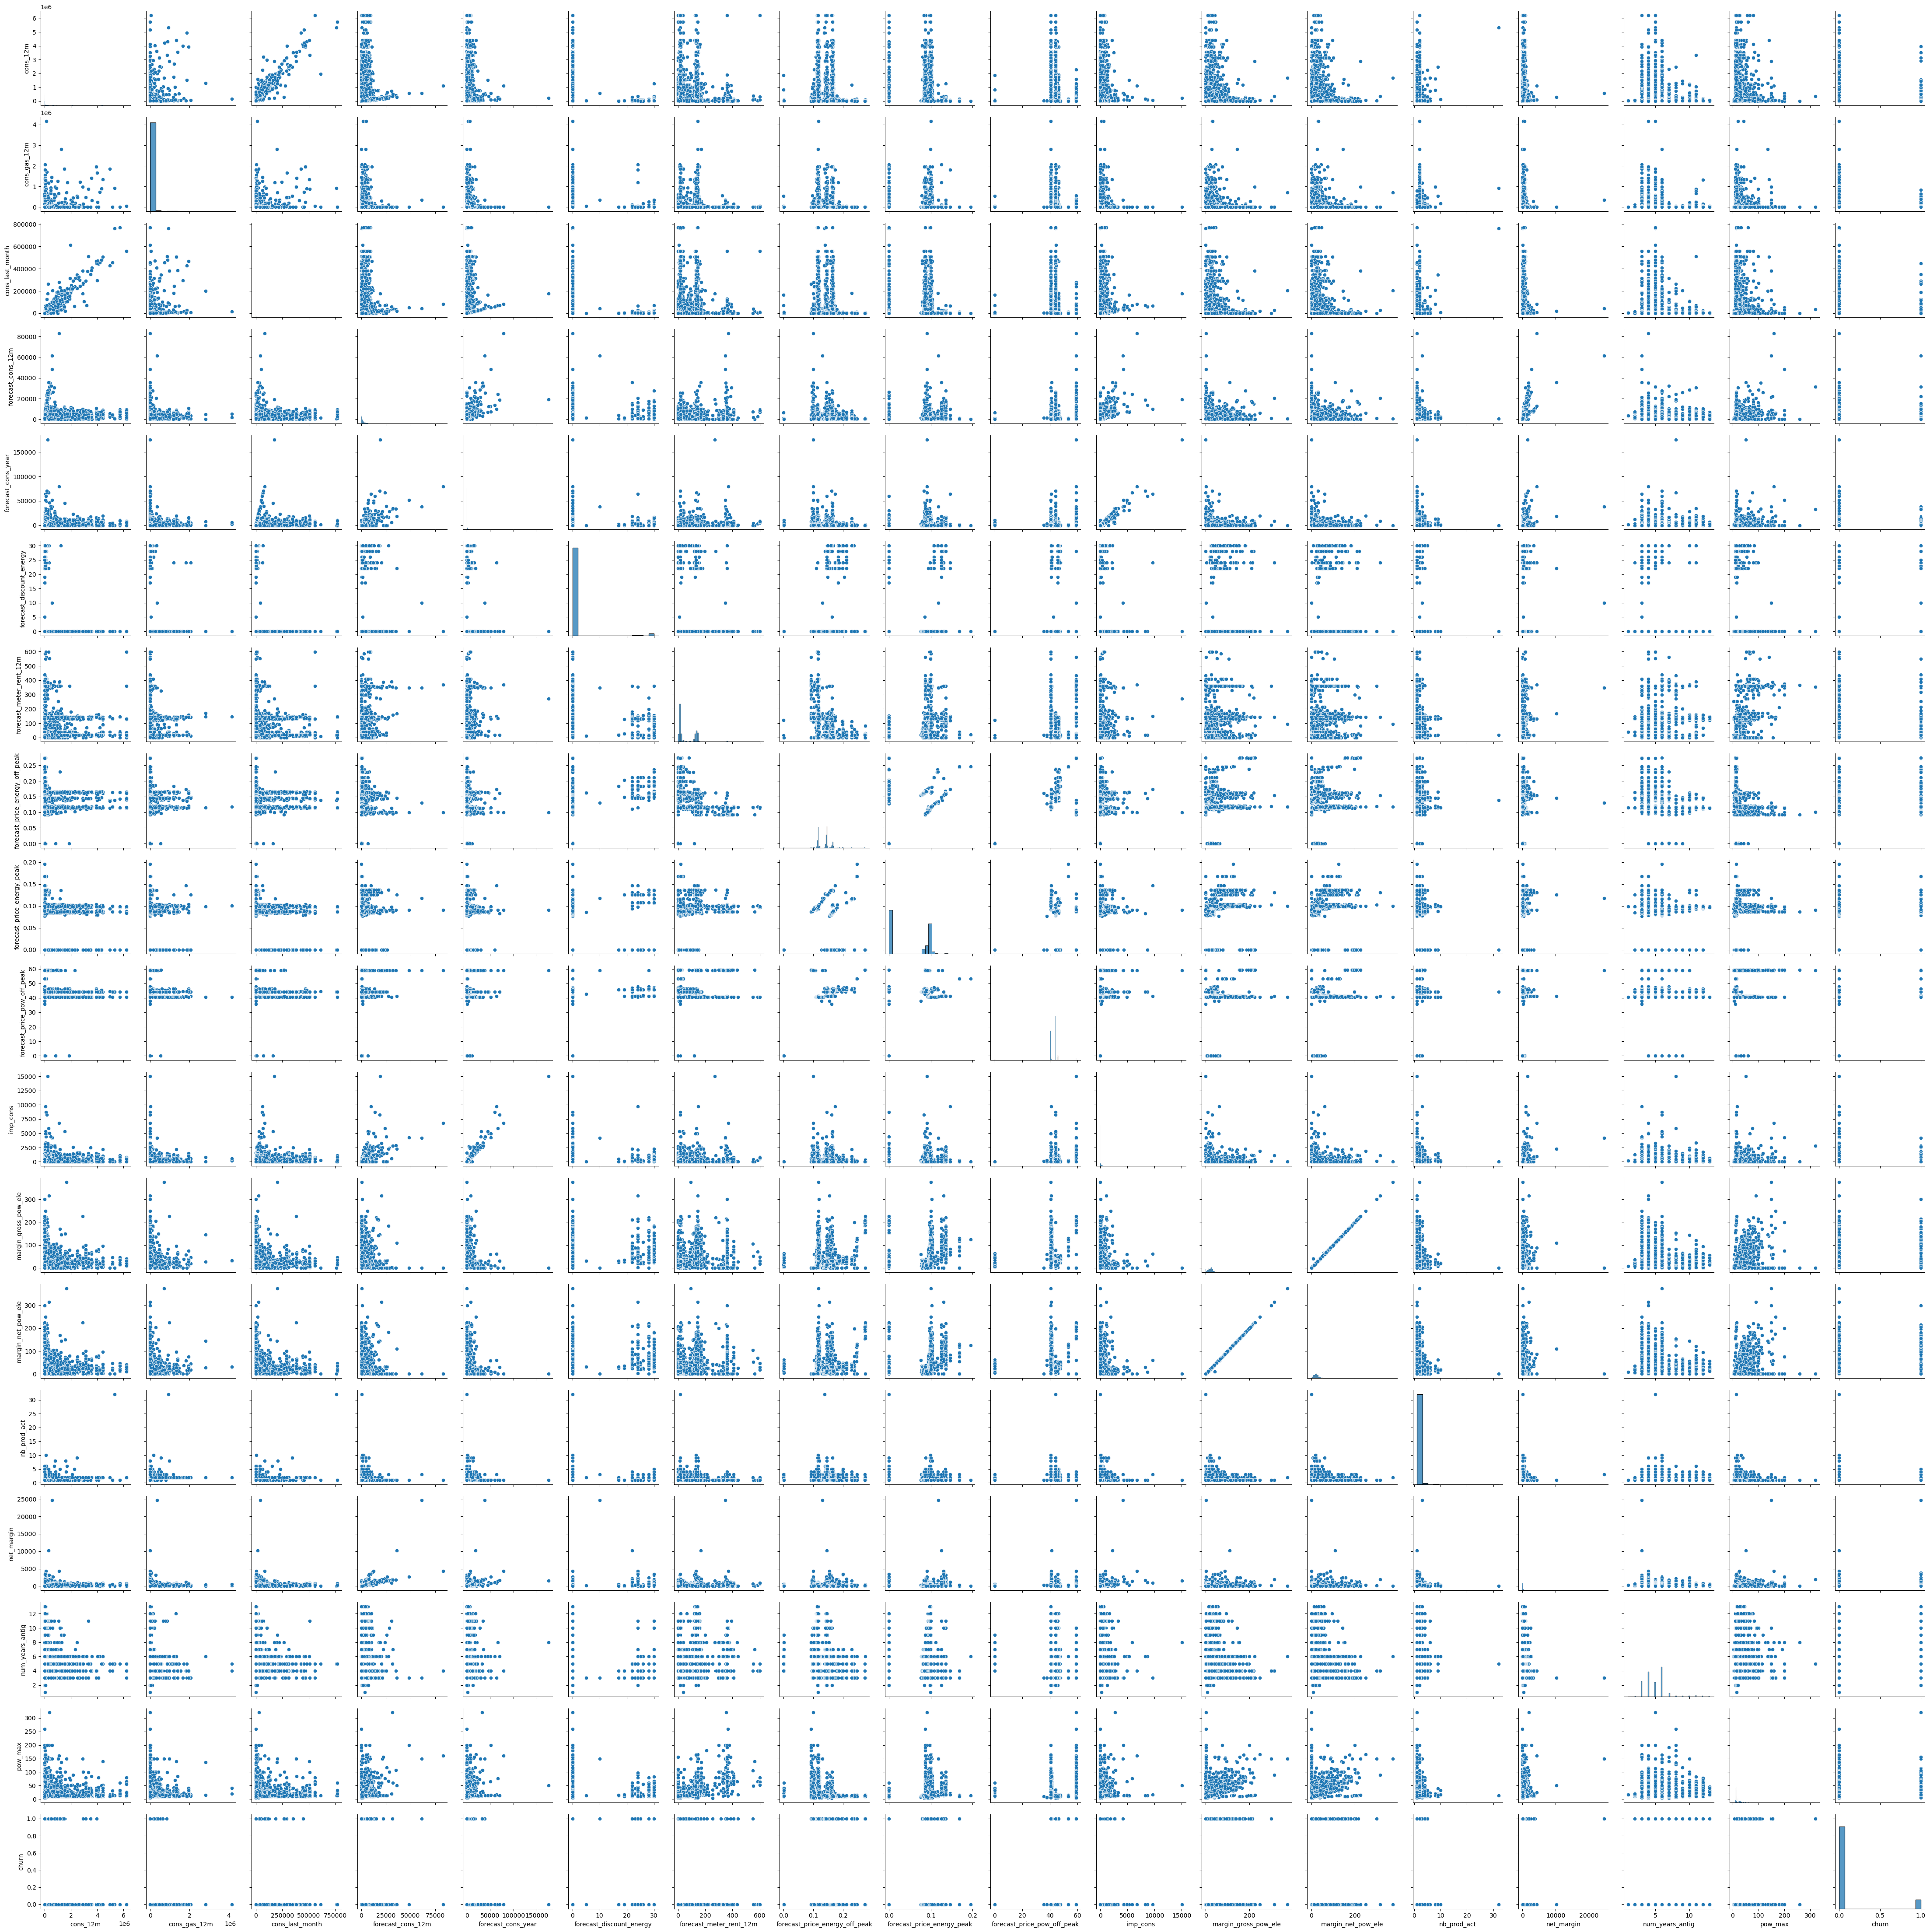

In [10]:
# Data visualization

sns.pairplot(data= client_df)

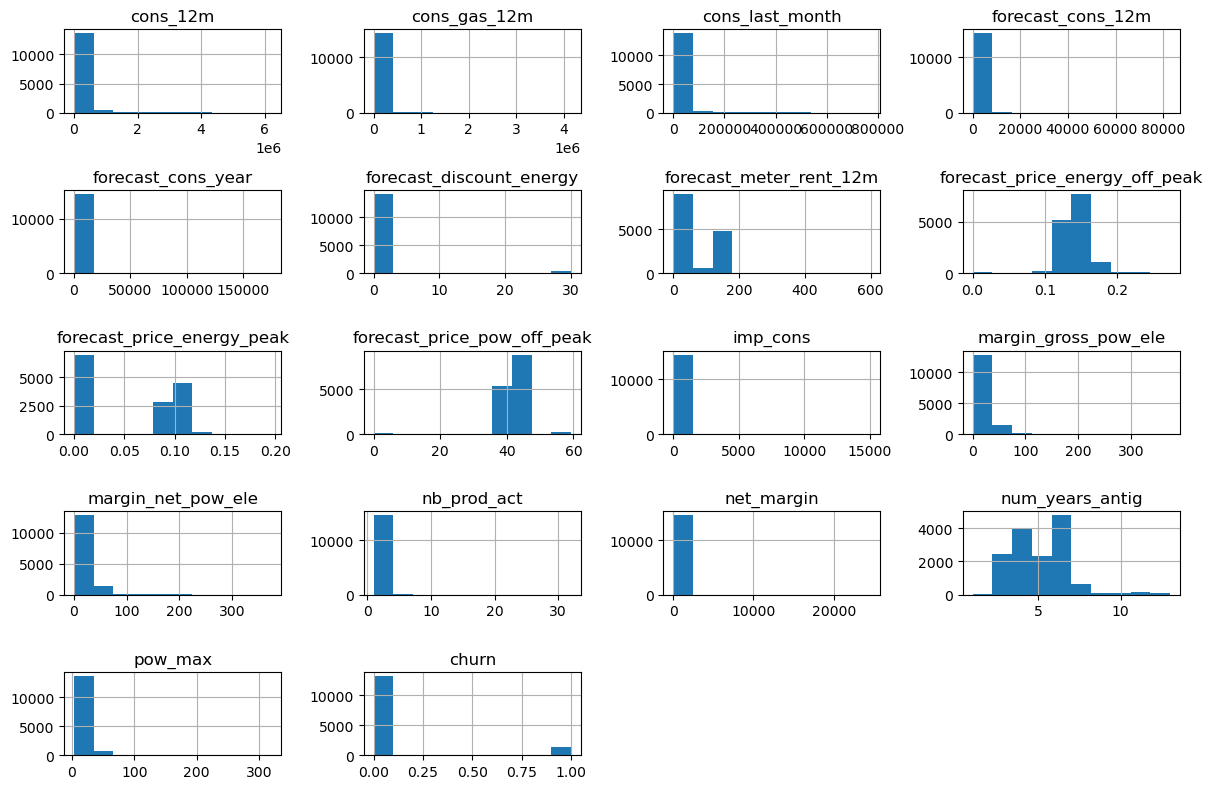

In [11]:
client_df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

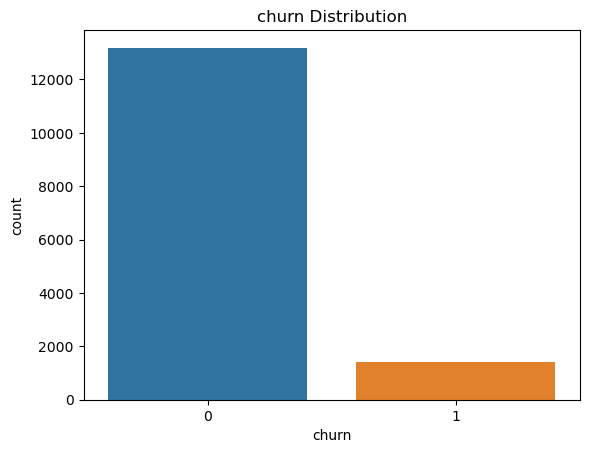

In [12]:
sns.countplot(data=client_df,x='churn')
plt.title("churn Distribution")
plt.show()

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

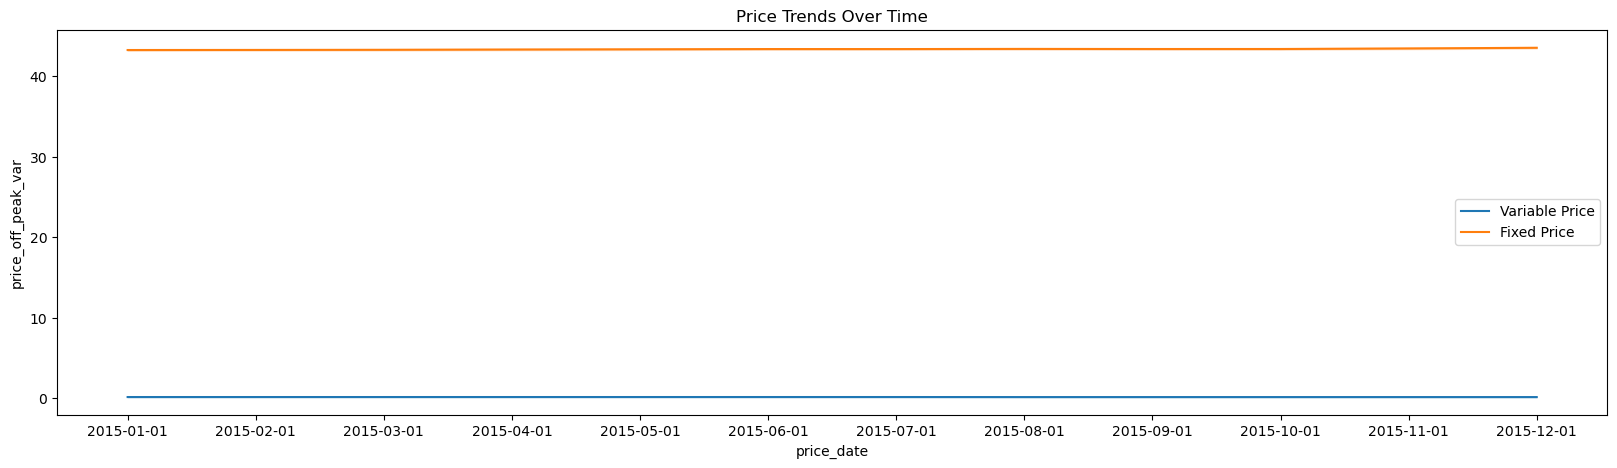

In [13]:
plt.figure(figsize=(20,5))
sns.lineplot(data=price_df,x='price_date',y='price_off_peak_var',label='Variable Price')
sns.lineplot(data=price_df,x='price_date',y='price_off_peak_fix',label='Fixed Price')
plt.legend()
plt.title("Price Trends Over Time")
plt.show()

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


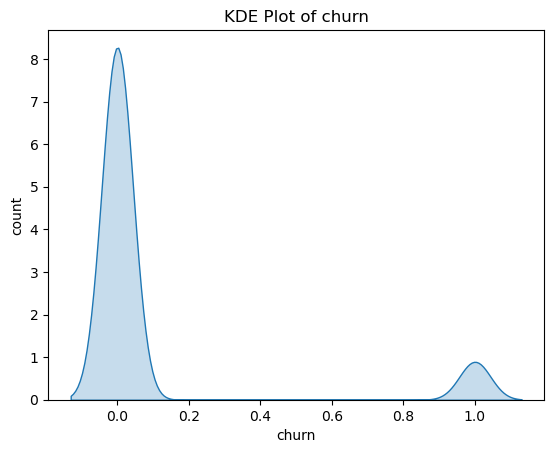

In [14]:
sns.kdeplot(data=client_df, x='churn', fill=True)
plt.title('KDE Plot of churn')
plt.xlabel('churn')
plt.ylabel('count')
plt.show()


In [15]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

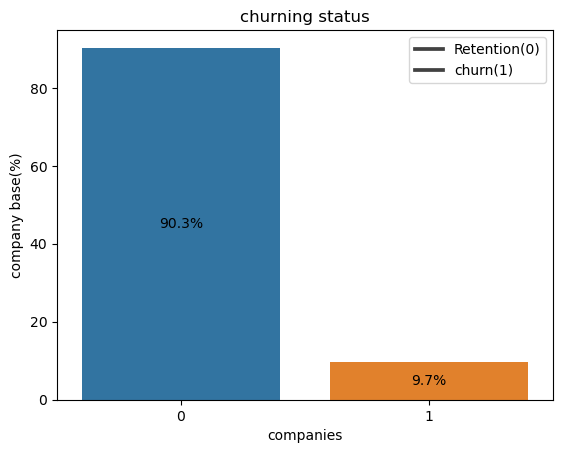

In [16]:
plot=sns.barplot(churn_percentage.T,estimator='mean')

for container in plot.containers:
    plot.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title("churning status")
plt.xlabel("companies")
plt.ylabel("company base(%)")
from matplotlib.patches import Patch
plt.legend(["Retention(0)","churn(1)"],loc="upper right")


In [17]:
#sales channel


channel = client_df[['id','channel_sales','churn']]
channel.head()
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)


In [18]:
channel_churn

churn                                      0          1
channel_sales                                          
foosdfpfkusacimwkcsosbicdxkicaua   87.859046  12.140954
usilxuppasemubllopkaafesmlibmsdf   89.963636  10.036364
ewpakwlliwisiwduibdlfmalxowmwpci   91.601344   8.398656
MISSING                            92.402685   7.597315
lmkebamcaaclubfxadlmueccxoimlema   94.411286   5.588714
epumfxlbckeskwekxbiuasklxalciiuu  100.000000   0.000000
fixdbufsefwooaasfcxdxadsiekoceaa  100.000000   0.000000
sddiedcslfslkckwlfkdpoeeailfpeds  100.000000   0.000000

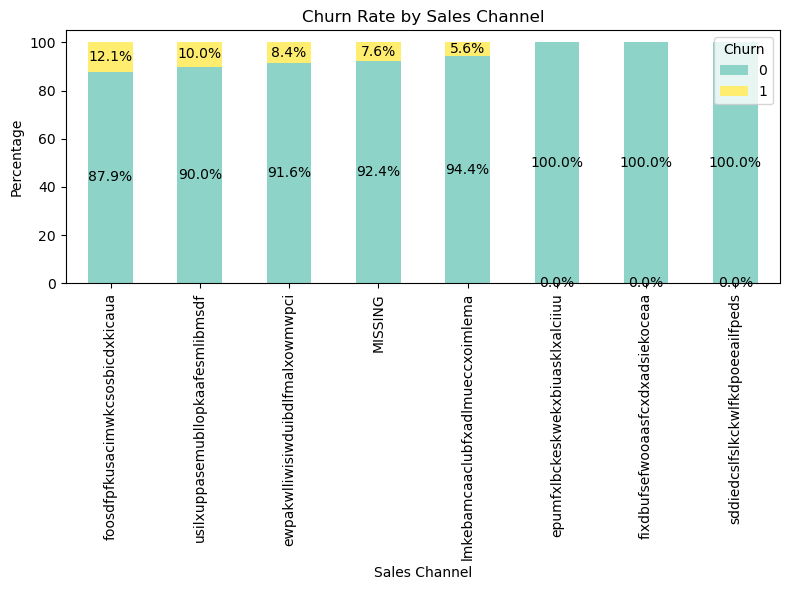

In [19]:
import matplotlib.pyplot as plt

ax = channel_churn.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set3')

# Add value labels on each bar

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('Churn Rate by Sales Channel')
plt.ylabel('Percentage')
plt.xlabel('Sales Channel')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [20]:
#consumption

consumption = client_df[['id','cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [21]:
consumption.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   imp_cons has_gas  churn  
0      0.00       t      1  
1      0.00       f      0  
2      0.00       f      0  
3      0.00       f      0  
4     52.32       f      0

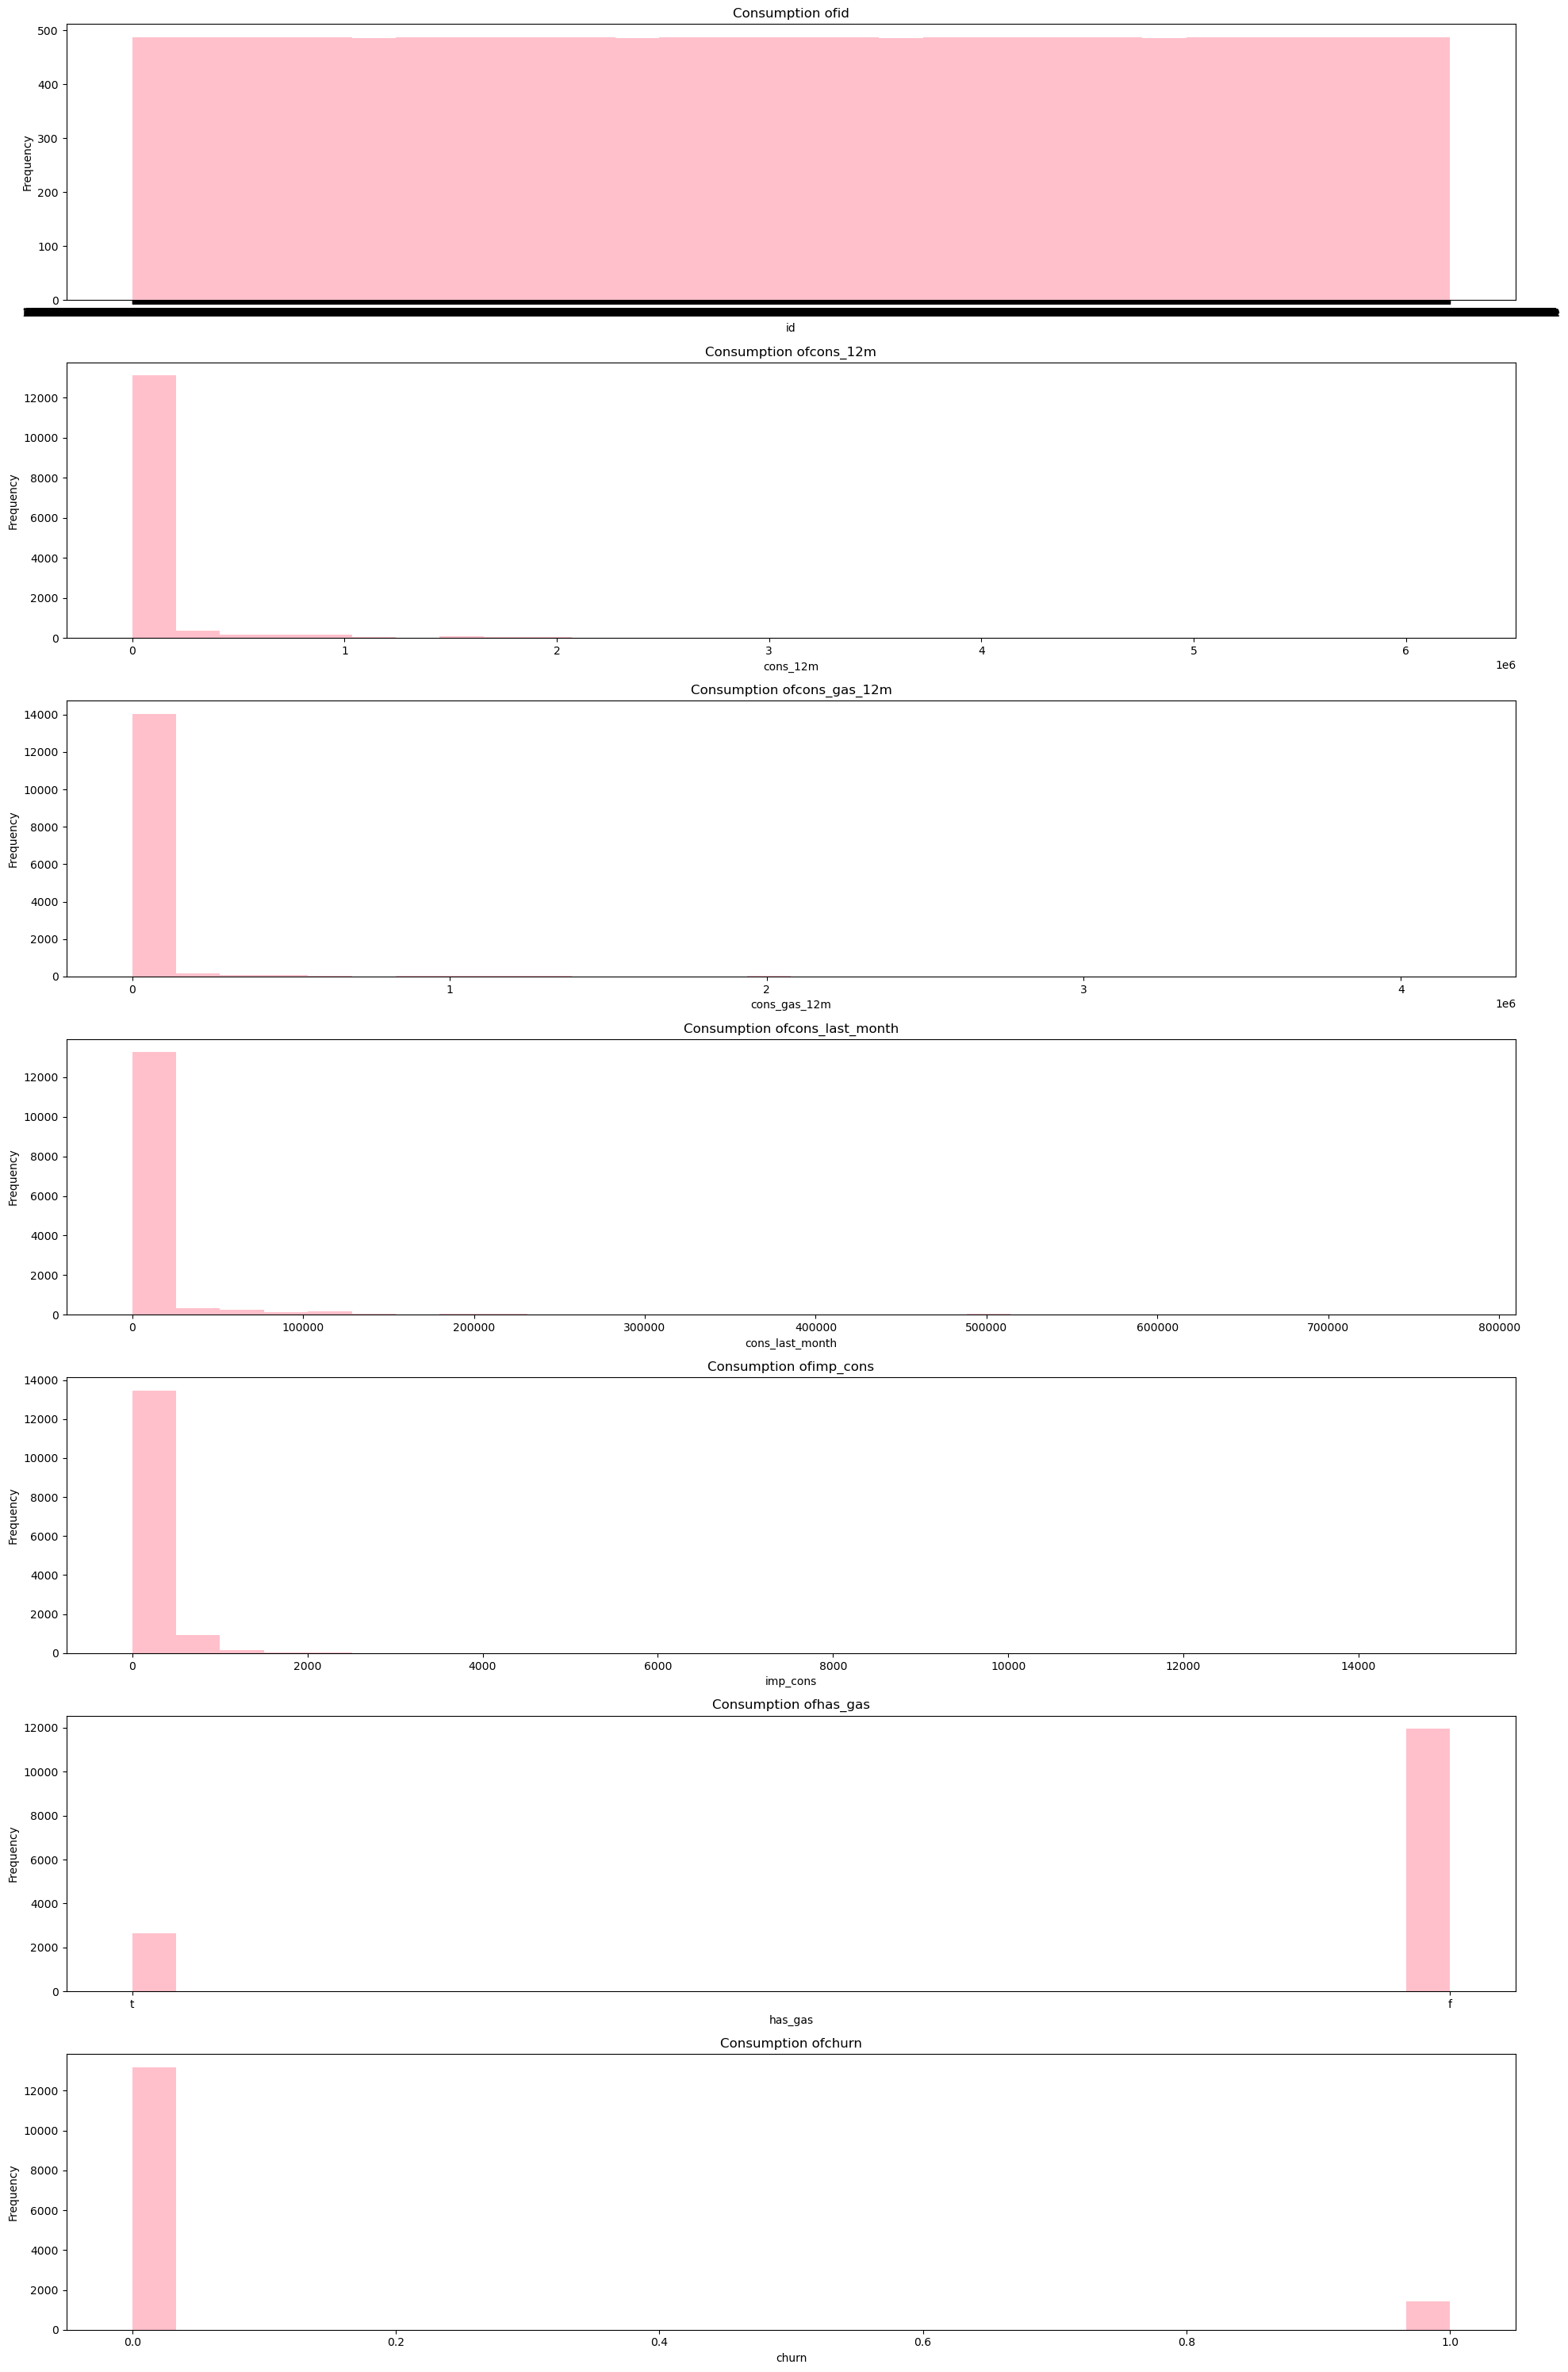

In [35]:

plt.figure(figsize=(20, 30))
columns=consumption.columns

for i,col in enumerate(columns):
    plt.subplot(len(columns), 1 ,i + 1)
    plt.hist(consumption[col].dropna(),bins=30,color='pink')
    plt.title(f'Consumption of{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




In [31]:
#forecast
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]


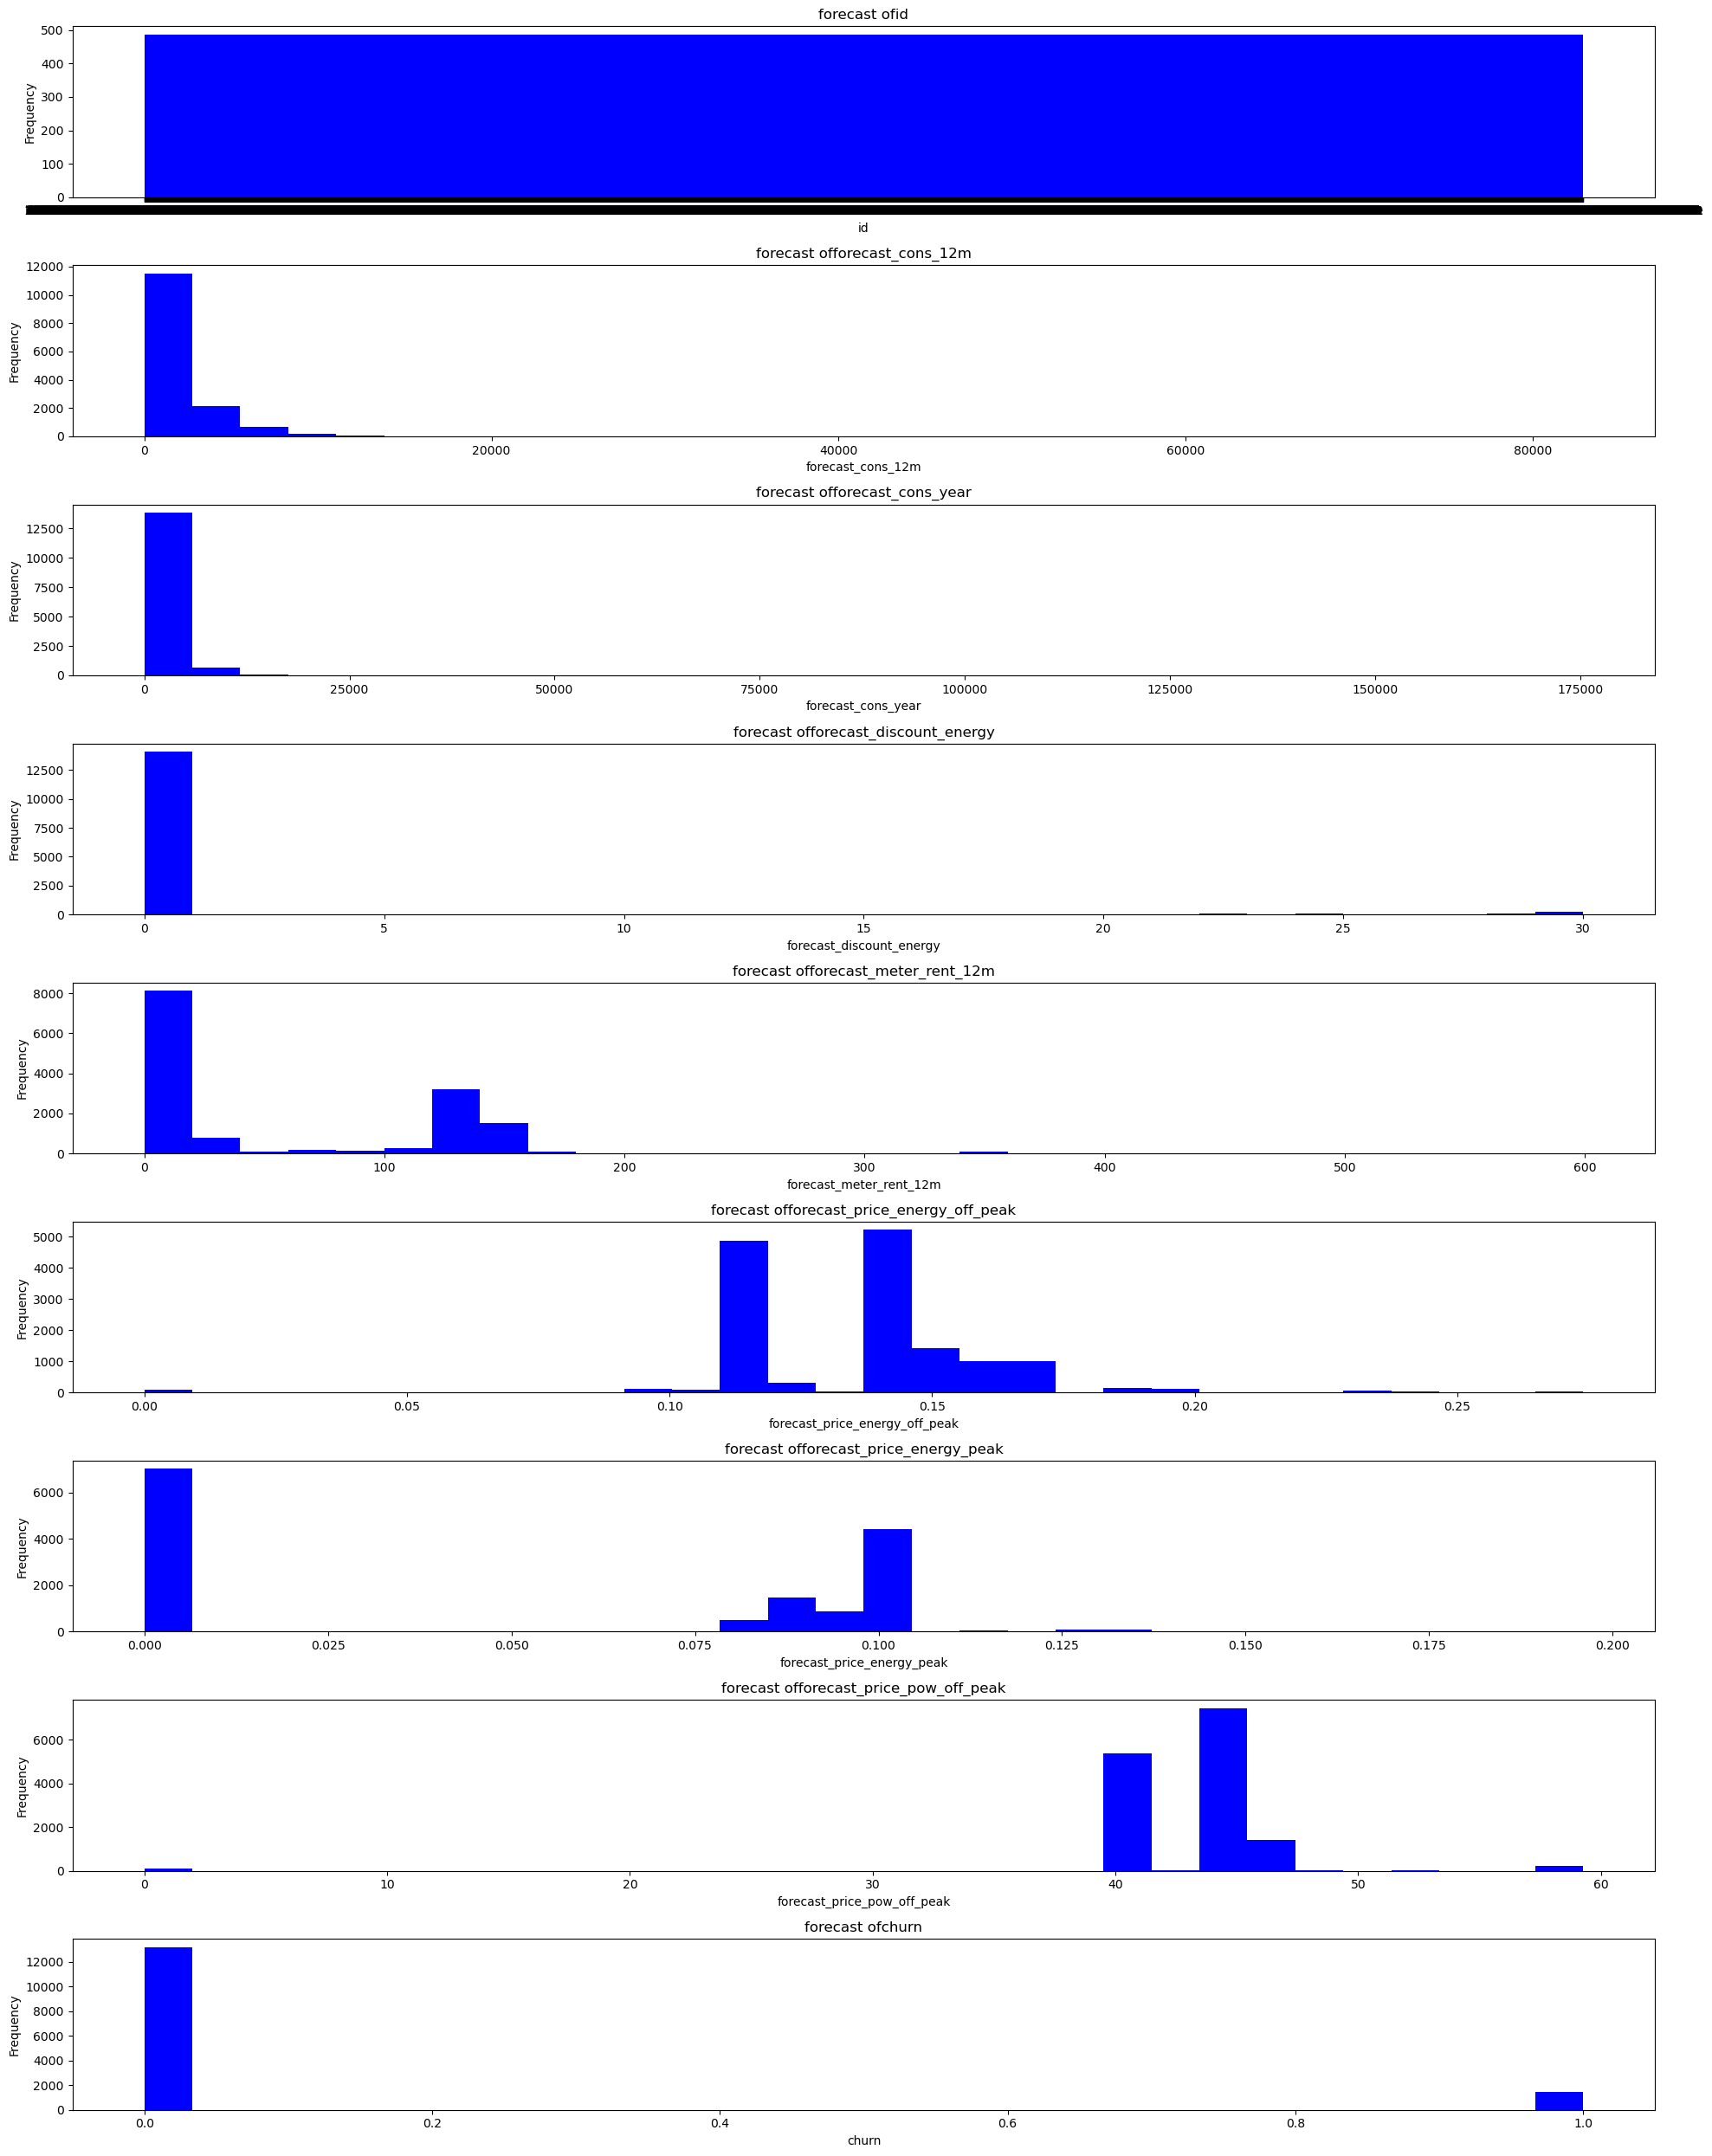

In [36]:
plt.figure(figsize=(20, 25))
columns=forecast.columns
for i,col in enumerate(columns):
    plt.subplot(len(columns), 1 ,i + 1)
    plt.hist(forecast[col].dropna(),bins=30,color='blue')
    plt.title(f'forecast of{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
#contract type

contract_type= client_df[['id','has_gas','churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

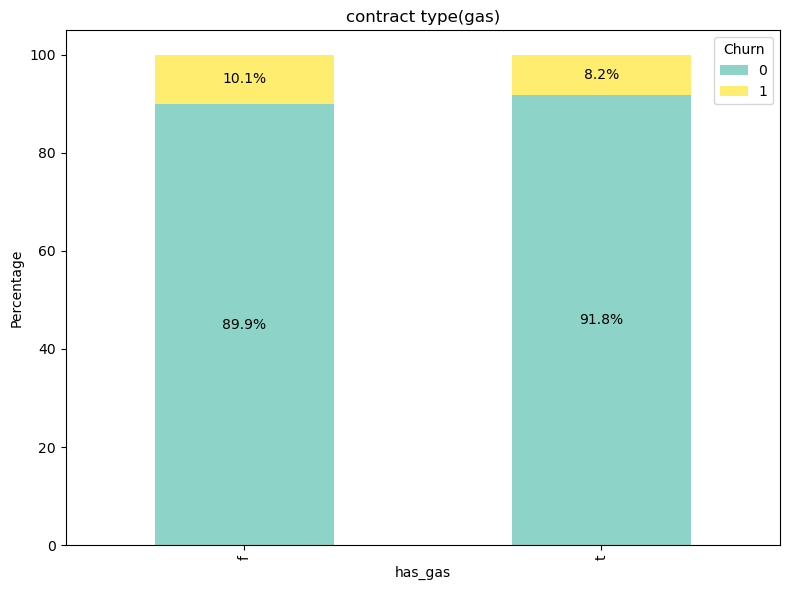

In [27]:
cx = contract_percentage.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set3')

# Add value labels on each bar

for container in cx.containers:
    cx.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('contract type(gas)')
plt.ylabel('Percentage')
plt.xlabel('has_gas')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [41]:
# Margins

margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
margin.head()

id  margin_gross_pow_ele  margin_net_pow_ele  \
0  24011ae4ebbe3035111d65fa7c15bc57                 25.44               25.44   
1  d29c2c54acc38ff3c0614d0a653813dd                 16.38               16.38   
2  764c75f661154dac3a6c254cd082ea7d                 28.60               28.60   
3  bba03439a292a1e166f80264c16191cb                 30.22               30.22   
4  149d57cf92fc41cf94415803a877cb4b                 44.91               44.91   

   net_margin  
0      678.99  
1       18.89  
2        6.60  
3       25.46  
4       47.98

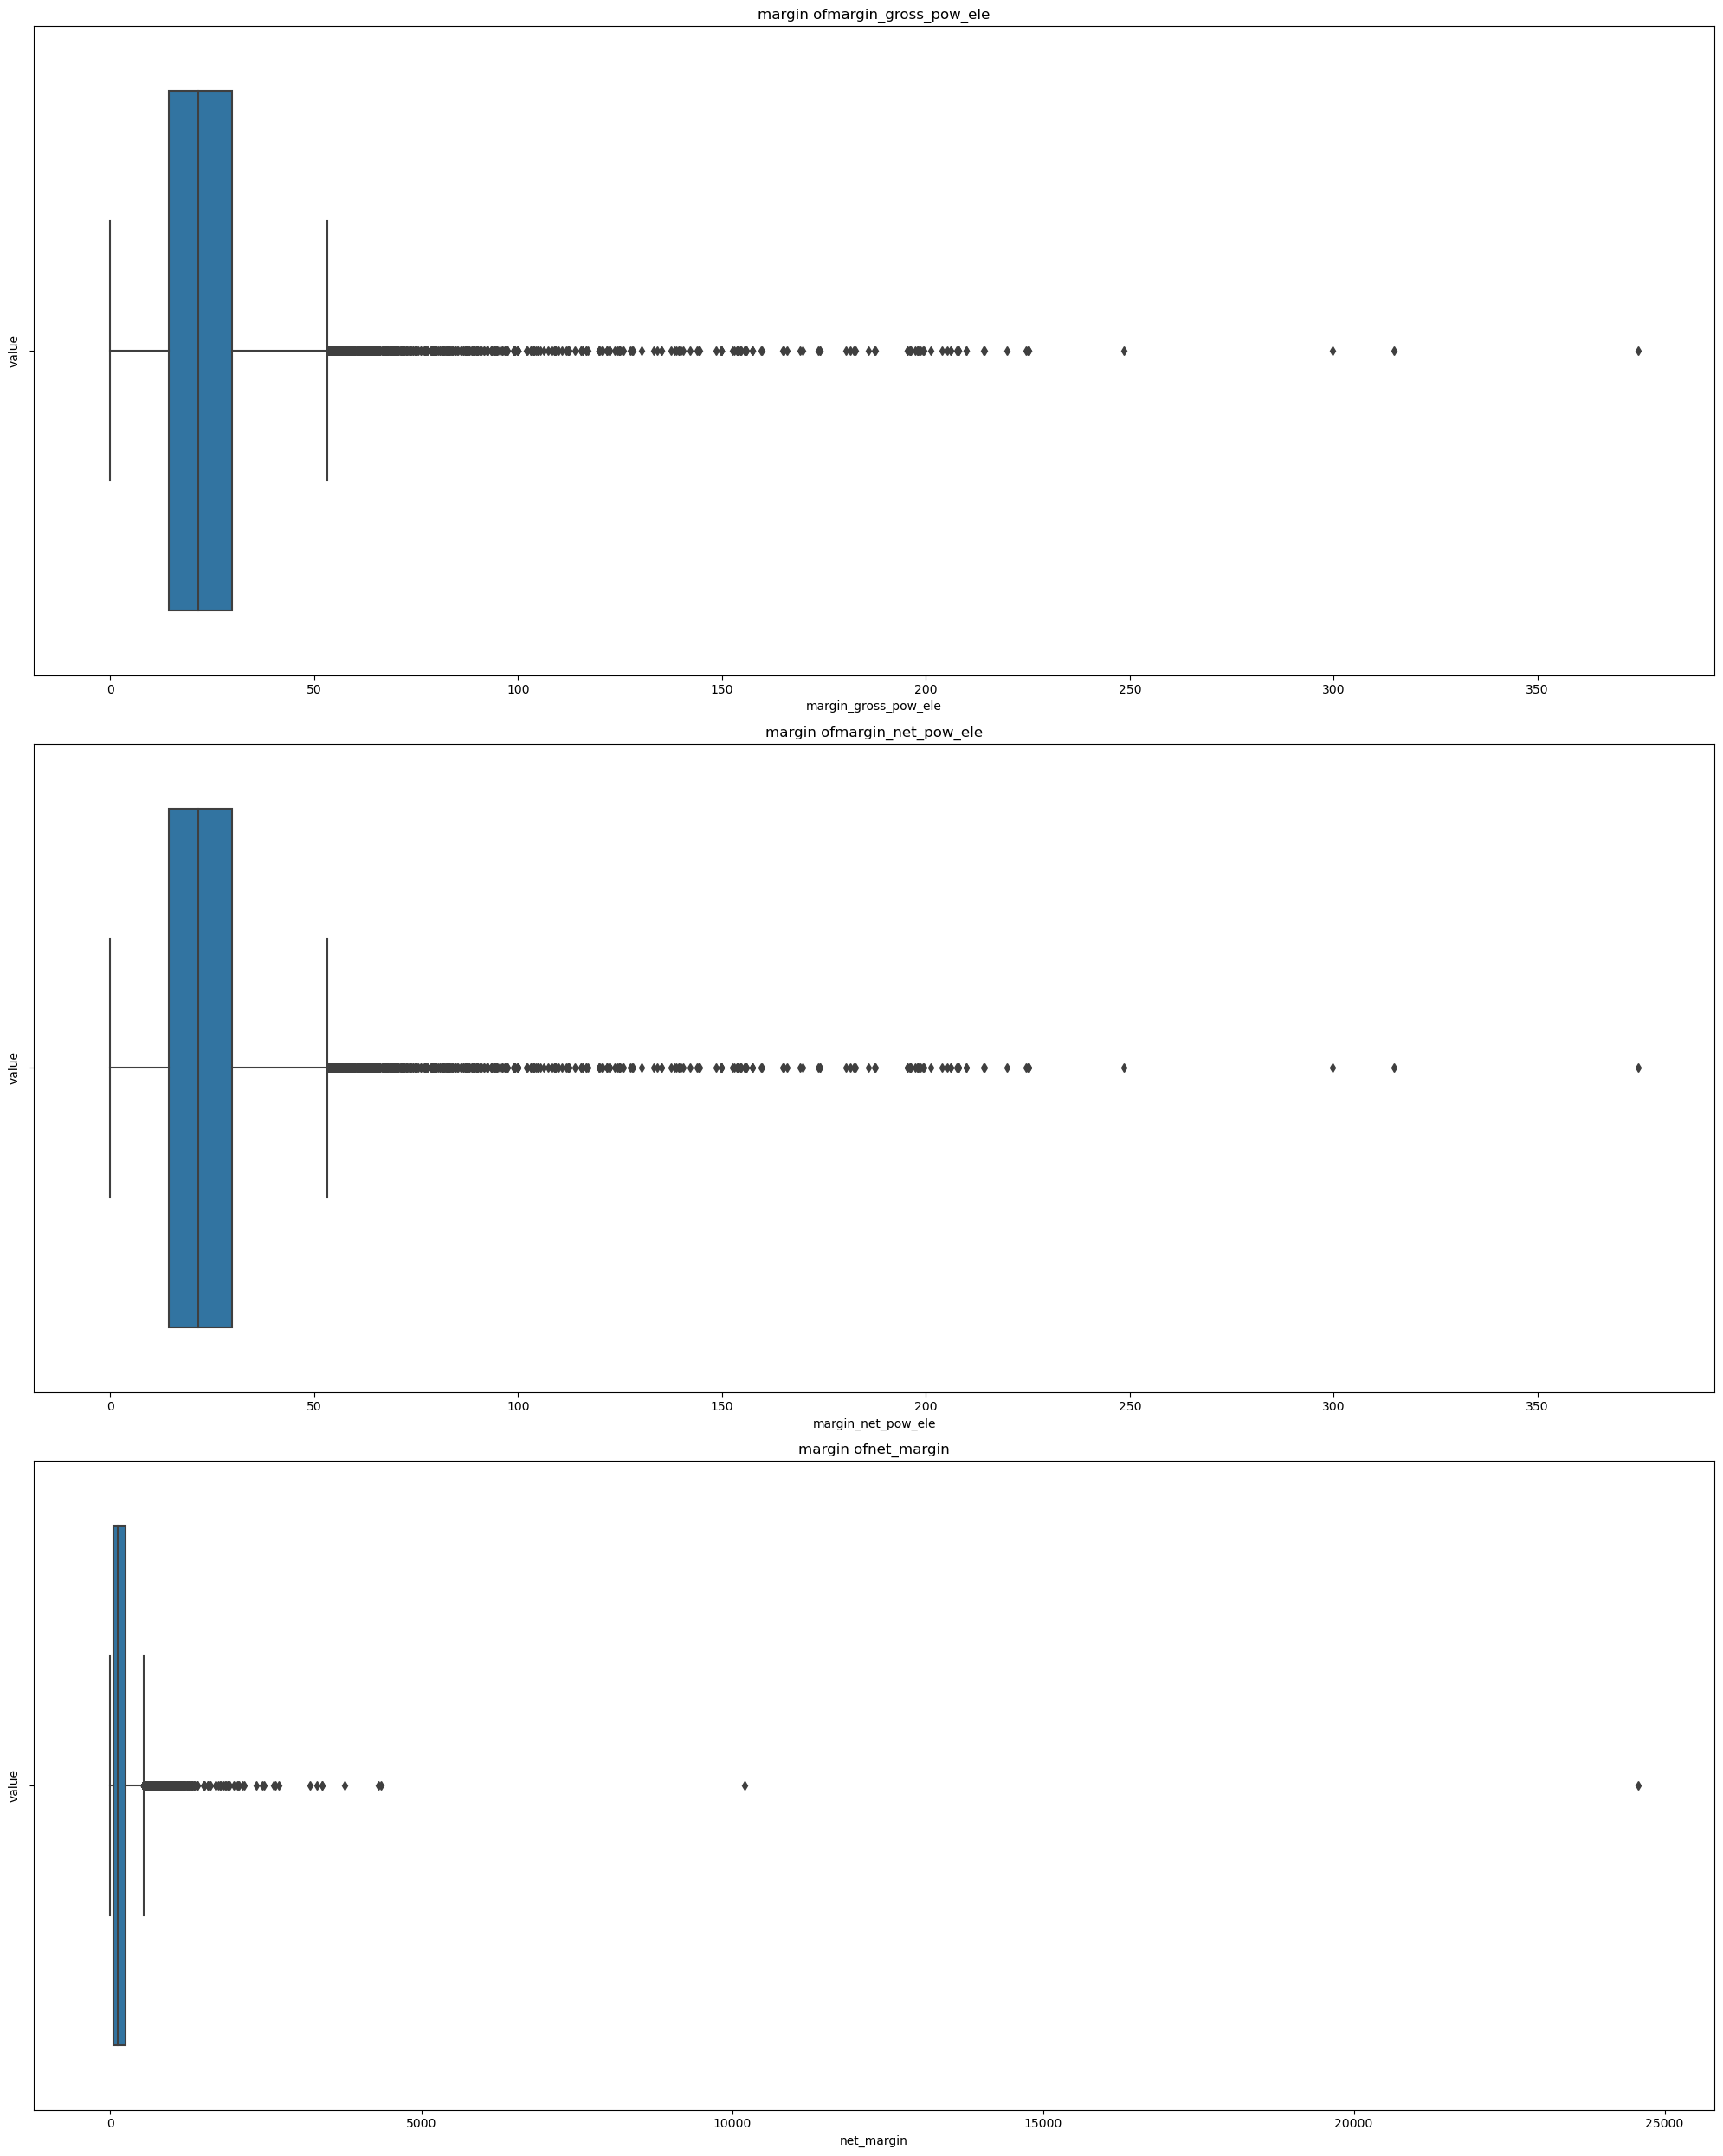

In [53]:
plt.figure(figsize=(20, 25))

numeric_margin=margin.select_dtypes(include='number')


for i,col in enumerate(numeric_margin.columns):
    plt.subplot(len(numeric_margin.columns), 1 ,i + 1)
    sns.boxplot(x=numeric_margin[col].dropna())
    plt.title(f'margin of{col}')
    plt.xlabel(col)
    plt.ylabel('value')

plt.tight_layout()
plt.show()

<Axes: xlabel='pow_max'>

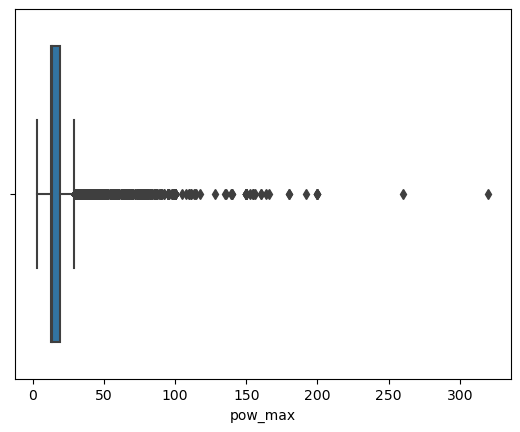

In [54]:
#subscribed power 

power = client_df[['id', 'pow_max', 'churn']]

sns.boxplot(power,x='pow_max')


# Feature Engineering

In [223]:
df=pd.read_csv('./clean_data_after_eda.csv')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

In [224]:
df["date_activ"]=pd.to_datetime(df["date_activ"],format='%Y-%m-%d')
df["date_end"]=pd.to_datetime(df["date_end"],format='%Y-%m-%d')
df["date_modif_prod"]=pd.to_datetime(df["date_modif_prod"],format='%Y-%m-%d')
df["date_renewal"]=pd.to_datetime(df["date_renewal"],format='%Y-%m-%d')

In [225]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

In [226]:
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [227]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [228]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id

id price_date  price_off_peak_var  \
0       0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1       0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
...                                  ...        ...                 ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01            0.119916   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01            0.119916   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01            0.119916   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

        price_off_peak_fix  
0                40.565969  
1                40.565969  
2                40.728885  
3                40.728885  
4                40.728885  
...                    ...  
192997           40.728885  
192998           40.728885  
192999           40.728885  
193000           40.728885  
193001           40.728885  

[193002 rows x 4 columns]

In [229]:
#get january and december price
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()


In [230]:
jan_prices

id price_date  price_off_peak_var  \
0      0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1      0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3      0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4      00114d74e963e47177db89bc70108537 2015-01-01            0.149434   
...                                 ...        ...                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-01-01            0.162720   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-01-01            0.148825   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-01-01            0.153159   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-01-01            0.127566   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-01-01            0.129444   

       price_off_peak_fix  
0               40.565969  
1               44.266931  
2               44.444710  
3               40.565969  
4               44.266931  
...                   ...  
16091           41.063970  
16092           44.266931  
16093           41.063970  
16094           40.565969  
16095           40.565969  

[16096 rows x 4 columns]

In [231]:
#calculate the difference between the off-peak price in december and precding january


diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()


id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [232]:
df.drop(df[df['channel_sales'] == 'MISSING'].index, inplace=True)

df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
5  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
6  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
5      8302             0             1998 2011-12-09 2016-12-09   
6     45097             0                0 2011-12-02 2016-12-02   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
5      2015-11-01   2015-12-10             796.94  ...   
6      2011-12-02   2015-12-03            8069.28  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
5                   0.000010           4.240524e-06   
6                   0.000004           9.450150e-08   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
2                   0.000000                   0.000000   
3                   0.000000                   0.000000   
5                   0.000000                   0.000000   
6                   0.000000                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
5               0.000000                   0.000000              0.000010   
6               0.000000                   0.000000              0.000004   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01              44.236702      1  
2       9.450150e-08               0.000000      0  
3       0.000000e+00               0.000000      0  
5       4.240524e-06               0.000000      1  
6       9.450150e-08               0.000000      1  

[5 rows x 44 columns]

In [233]:
#Average price changes across periods

mean_prices= price_df.groupby(['id']).agg({
    'price_off_peak_var':'mean',
    'price_peak_var':'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix':'mean'  
}).reset_index()

In [234]:
#calculate mean difference between consecutive periods

mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [235]:
columns=[
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]

df=pd.merge(df,mean_prices[columns],on='id')

In [236]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   
3      8302             0             1998 2011-12-09 2016-12-09   
4     45097             0                0 2011-12-02 2016-12-02   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_off_peak  \
0      2015-11-01   2015-06-23               0.00  ...               2.086425   
1      2010-04-16   2015-04-17              47.96  ...               0.000004   
2      2010-03-30   2015-03-31             240.04  ...               0.000003   
3      2015-11-01   2015-12-10             796.94  ...               0.000010   
4      2011-12-02   2015-12-03            8069.28  ...               0.000004   

   var_6m_price_peak  var_6m_price_mid_peak  churn  \
0       9.953056e+01              44.236702      1   
1       9.450150e-08               0.000000      0   
2       0.000000e+00               0.000000      0   
3       4.240524e-06               0.000000      1   
4       9.450150e-08               0.000000      1   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.082090                     0.088421   
2                     0.151210                     0.000000   
3                     0.081320                     0.087632   
4                     0.081316                     0.084744   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.170512                    44.385450   
2                        0.151210                    44.400265   
3                        0.168953                    44.266930   
4                        0.166061                    44.266930   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                      7.45067                        26.040925  
1                      0.00000                        44.385450  
2                      0.00000                        44.400265  
3                      0.00000                        44.266930  
4                      0.00000                        44.266930  

[5 rows x 50 columns]

In [237]:
# aggregate avg price per period by company


mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()


In [238]:
#calculate the mean difference betweeen consecutive periods

mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [239]:
#calculate the maximum monthly difference across time periods

max_diff_across_periods_months=mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'   
    
}).reset_index().rename(

    columns={
        
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'      
    }


)
                                                             
                                                                                                                      
                                                            

In [240]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df=pd.merge(df,max_diff_across_periods_months[columns],on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1       544             0                0 2010-04-16 2016-04-16   
2      1584             0                0 2010-03-30 2016-03-30   
3      8302             0             1998 2011-12-09 2016-12-09   
4     45097             0                0 2011-12-02 2016-12-02   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2010-04-16   2015-04-17              47.96  ...   
2      2010-03-30   2015-03-31             240.04  ...   
3      2015-11-01   2015-12-10             796.94  ...   
4      2011-12-02   2015-12-03            8069.28  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.170512                    44.385450   
2                         0.151210                    44.400265   
3                         0.168953                    44.266930   
4                         0.166061                    44.266930   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                      7.45067                        26.040925   
1                      0.00000                        44.385450   
2                      0.00000                        44.400265   
3                      0.00000                        44.266930   
4                      0.00000                        44.266930   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.084587                            0.089162   
2                            0.153133                            0.000000   
3                            0.082931                            0.088815   
4                            0.082931                            0.085058   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.172468                           44.444710   
2                               0.153133                           44.444710   
3                               0.171746                           44.266931   
4                               0.167989                           44.266930   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                               44.266930  
1                            0.000000                               44.444710  
2                            0.000000                               44.444710  
3                            0.000000                               44.266931  
4                            0.000000                               44.266930  

[5 rows x 56 columns]

In [241]:
#Tenure

df['date_activ']=pd.to_datetime(df['date_activ'])
df['date_end']=pd.to_datetime(df['date_end'])

df['tenure']=((df['date_end']-df['date_activ']).dt.days//365)

In [242]:
df.groupby(['tenure']).agg({'churn':'mean'}).sort_values(by='tenure',ascending=False)

churn
tenure          
11      0.000000
10      0.000000
9       0.000000
8       0.076923
7       0.067568
6       0.072845
5       0.096761
4       0.127187
3       0.144789
2       0.176471

In [243]:
def convert_months(reference_date, df, column):
    """
    Return number of whole months between reference_date and a date column in df.
    """
    dates = pd.to_datetime(df[column], errors='coerce')  # Convert to datetime

    year_diff  = reference_date.year  - dates.dt.year
    month_diff = reference_date.month - dates.dt.month

    months = year_diff * 12 + month_diff

    # Subtract 1 if the reference day hasn't been reached yet in that month
    months -= (reference_date.day < dates.dt.day).astype(int)

    return months


In [244]:
# Create reference date
reference_date = pd.to_datetime("2016-01-01") 

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [245]:
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1       544             0                0              47.96   
2      1584             0                0             240.04   
3      8302             0             1998             796.94   
4     45097             0                0            8069.28   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    38.72   
2                   0                       0.0                    19.83   
3                1998                       0.0                    30.12   
4                   0                       0.0                     0.00   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.165794  ...                            0.089162   
2                        0.146694  ...                            0.000000   
3                        0.164775  ...                            0.088815   
4                        0.166178  ...                            0.085058   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.172468                          44.444710   
2                                0.153133                          44.444710   
3                                0.171746                          44.266931   
4                                0.167989                          44.266930   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                               44.266930   
1                            0.000000                               44.444710   
2                            0.000000                               44.444710   
3                            0.000000                               44.266931   
4                            0.000000                               44.266930   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              6                  2              6  
1       6            68              4                 68              8  
2       6            69              3                 69              9  
3       5            48             12                  2              0  
4       5            48             12                 48              0  

[5 rows x 57 columns]

In [246]:
#transforming boolean data


df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])
df.groupby(['has_gas']).agg({'churn':'mean'})

C:\Users\sarad\AppData\Local\Temp\ipykernel_19368\2524690213.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])


churn
has_gas          
0        0.107783
1        0.088421

In [247]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1       544             0                0              47.96   
2      1584             0                0             240.04   
3      8302             0             1998             796.94   
4     45097             0                0            8069.28   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    38.72   
2                   0                       0.0                    19.83   
3                1998                       0.0                    30.12   
4                   0                       0.0                     0.00   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.165794  ...                            0.089162   
2                        0.146694  ...                            0.000000   
3                        0.164775  ...                            0.088815   
4                        0.166178  ...                            0.085058   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                           44.266930   
1                                0.172468                           44.444710   
2                                0.153133                           44.444710   
3                                0.171746                           44.266931   
4                                0.167989                           44.266930   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                               44.266930   
1                            0.000000                               44.444710   
2                            0.000000                               44.444710   
3                            0.000000                               44.266931   
4                            0.000000                               44.266930   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              6                  2              6  
1       6            68              4                 68              8  
2       6            69              3                 69              9  
3       5            48             12                  2              0  
4       5            48             12                 48              0  

[5 rows x 57 columns]

In [248]:
# transforming categorical data

freq_map = df['channel_sales'].value_counts().to_dict()
df['channel_sales_freq'] = df['channel_sales'].map(freq_map)


In [249]:
df['channel_sales'].nunique()
df['channel_sales'].value_counts()


channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [250]:
df['channel_sales']

0        foosdfpfkusacimwkcsosbicdxkicaua
1        foosdfpfkusacimwkcsosbicdxkicaua
2        lmkebamcaaclubfxadlmueccxoimlema
3        usilxuppasemubllopkaafesmlibmsdf
4        foosdfpfkusacimwkcsosbicdxkicaua
                       ...               
10876    foosdfpfkusacimwkcsosbicdxkicaua
10877    foosdfpfkusacimwkcsosbicdxkicaua
10878    foosdfpfkusacimwkcsosbicdxkicaua
10879    foosdfpfkusacimwkcsosbicdxkicaua
10880    foosdfpfkusacimwkcsosbicdxkicaua
Name: channel_sales, Length: 10881, dtype: object

In [251]:
skewed_cols = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

print('before log transform:\n')
print(df[skewed_cols].describe())


df[skewed_cols] = np.log10(df[skewed_cols] + 1)

print("\nAfter log transform:")
print(df[skewed_cols].describe())

before log transform:

           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.088100e+04  1.088100e+04     10881.000000       10881.000000   
mean   1.748101e+05  2.838472e+04     17463.076831        1915.498152   
std    6.118479e+05  1.698310e+05     68045.376986        2417.636132   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.894000e+03  0.000000e+00         0.000000         520.280000   
50%    1.497300e+04  0.000000e+00       847.000000        1161.770000   
75%    4.421000e+04  0.000000e+00      3633.000000        2482.250000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        10881.000000              10881.000000             10881.000000   
mean          1397.827589                  1.078394                62.854075   
std           2902.137154                  5.364080                65.592301   

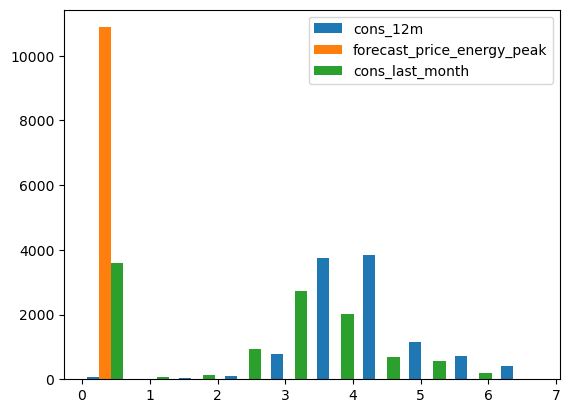

In [252]:
cols= ["cons_12m", "forecast_price_energy_peak", "cons_last_month"]
plt.hist(df[cols].dropna())
plt.legend(cols)

In [253]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  2.736397      0.000000         0.000000           1.689841   
2  3.200029      0.000000         0.000000           2.382089   
3  3.919235      0.000000         3.300813           2.901970   
4  4.654157      0.000000         0.000000           3.906889   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.000000                       0.0                 0.444045   
1            0.000000                       0.0                 1.599009   
2            0.000000                       0.0                 1.318689   
3            3.300813                       0.0                 1.493040   
4            0.000000                       0.0                 0.000000   

   forecast_price_energy_off_peak  ...  \
0                        0.047073  ...   
1                        0.066622  ...   
2                        0.059448  ...   
3                        0.066242  ...   
4                        0.066765  ...   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                           44.266930   
1                                0.172468                           44.444710   
2                                0.153133                           44.444710   
3                                0.171746                           44.266931   
4                                0.167989                           44.266930   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                               44.266930   
1                            0.000000                               44.444710   
2                            0.000000                               44.444710   
3                            0.000000                               44.266931   
4                            0.000000                               44.266930   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  \
0       3            30              6                  2               6   
1       6            68              4                 68               8   
2       6            69              3                 69               9   
3       5            48             12                  2               0   
4       5            48             12                 48               0   

  channel_sales_freq  
0               6754  
1               6754  
2               1843  
3               1375  
4               6754  

[5 rows x 58 columns]

In [254]:

correlation = df.select_dtypes(include='number').corr()


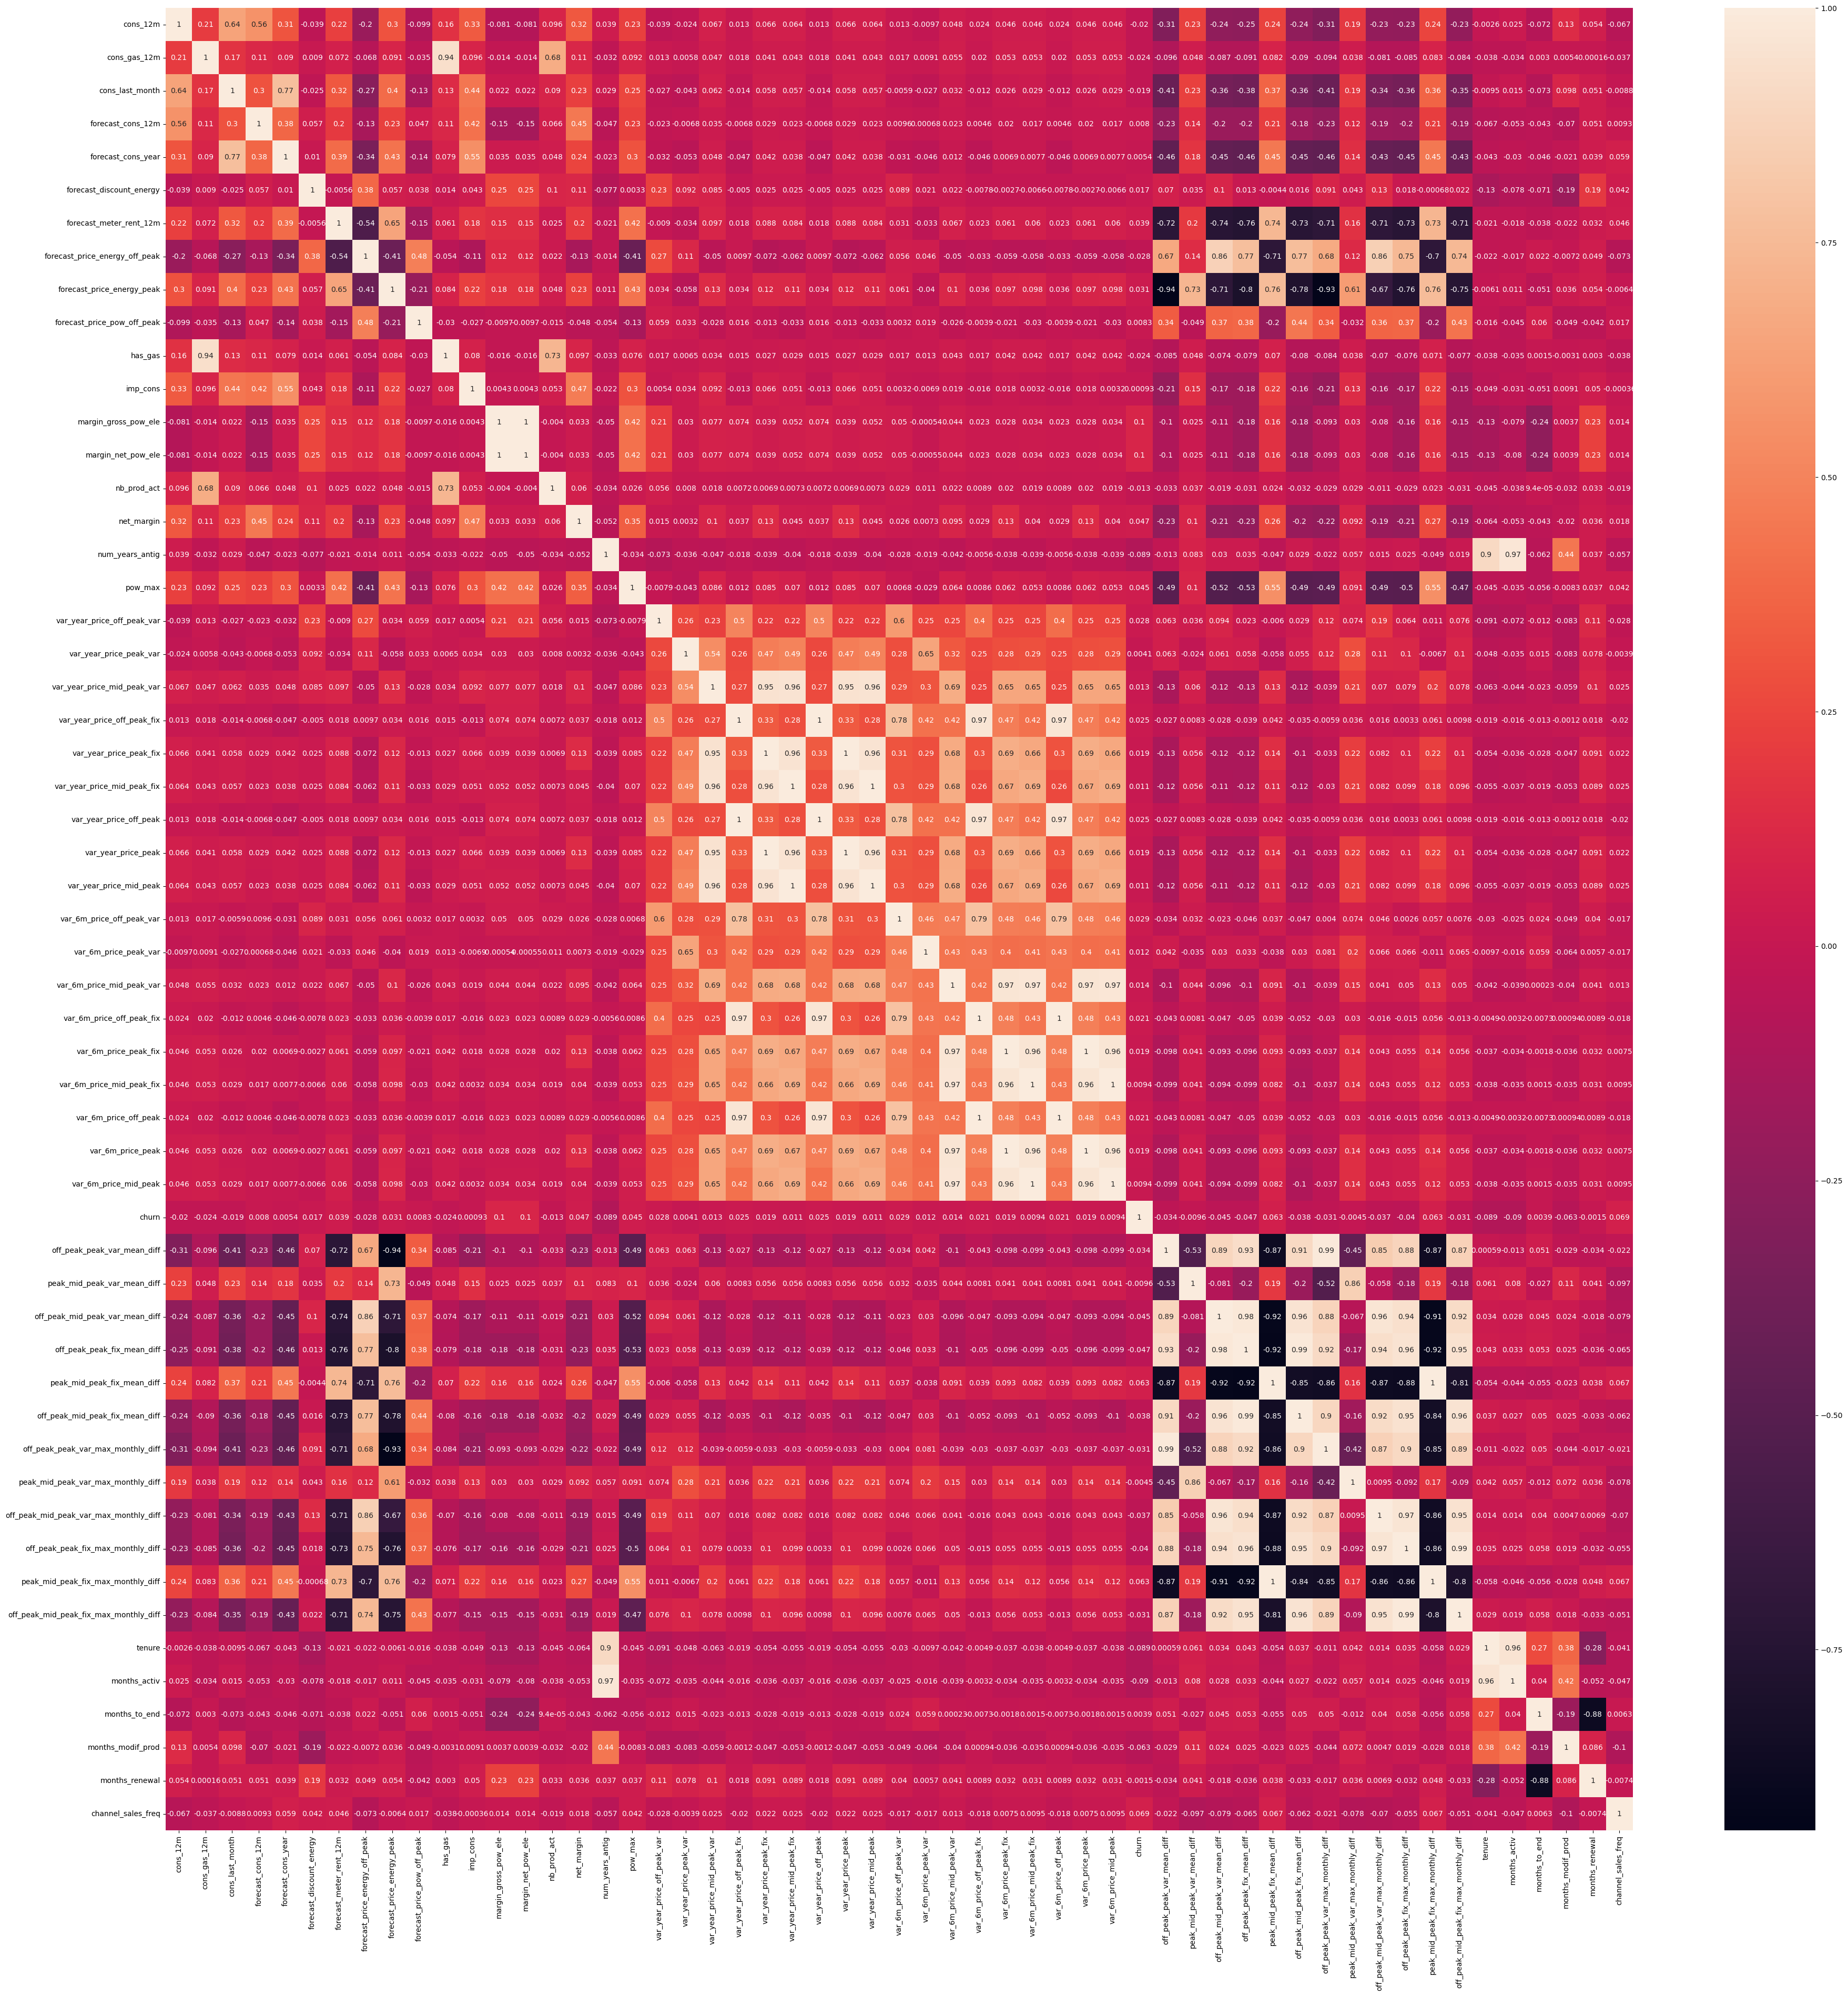

In [255]:
plt.figure(figsize=(45, 45))
sns.heatmap(correlation,annot=True)
plt.show()

In [256]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
2  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
3  1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
4  7ab4bf4878d8f7661dfc20e9b8e18011  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  2.736397      0.000000         0.000000           1.689841   
2  3.200029      0.000000         0.000000           2.382089   
3  3.919235      0.000000         3.300813           2.901970   
4  4.654157      0.000000         0.000000           3.906889   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 0.444045   
1                       0.0                 1.599009   
2                       0.0                 1.318689   
3                       0.0                 1.493040   
4                       0.0                 0.000000   

   forecast_price_energy_off_peak  forecast_price_energy_peak  ...  \
0                        0.047073                    0.040659  ...   
1                        0.066622                    0.036589  ...   
2                        0.059448                    0.000000  ...   
3                        0.066242                    0.035882  ...   
4                        0.066765                    0.036444  ...   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                           44.266930   
1                                0.172468                           44.444710   
2                                0.153133                           44.444710   
3                                0.171746                           44.266931   
4                                0.167989                           44.266930   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                               44.266930   
1                            0.000000                               44.444710   
2                            0.000000                               44.444710   
3                            0.000000                               44.266931   
4                            0.000000                               44.266930   

   tenure  months_activ  months_to_end months_modif_prod  months_renewal  \
0       3            30              6                 2               6   
1       6            68              4                68               8   
2       6            69              3                69               9   
3       5            48             12                 2               0   
4       5            48             12                48               0   

   channel_sales_freq  
0                6754  
1                6754  
2                1843  
3                1375  
4                6754  

[5 rows x 56 columns]

In [257]:
from sklearn.model_selection import train_test_split

In [269]:
X=df.drop(columns=['id','churn','channel_sales'])
y=df['churn']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [271]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7290, 53)
(7290,)
(3591, 53)
(3591,)


In [272]:
from sklearn.ensemble import RandomForestClassifier

In [275]:
X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')


In [287]:
rfc=RandomForestClassifier(n_estimators=200,class_weight='balanced')
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [288]:
rfc_predict=rfc.predict(X_test)

In [289]:
from sklearn.metrics import classification_report,confusion_matrix

In [291]:
print(f'confusion matrix:\n{confusion_matrix(y_test,rfc_predict)}')
print('\n')
print(f'classificaton report:\n{classification_report(y_test,rfc_predict)}')

confusion matrix:
[[3201    4]
 [ 364   22]]


classificaton report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3205
           1       0.85      0.06      0.11       386

    accuracy                           0.90      3591
   macro avg       0.87      0.53      0.53      3591
weighted avg       0.89      0.90      0.86      3591



In [293]:
'''Recall for churners is very low (0.06) → the model misses most actual churners.

F1-score is only 0.11, showing poor balance between precision and recall.

Accuracy is high (90%) but not meaningful due to imbalance.'''

'Recall for churners is very low (0.06) → the model misses most actual churners.\n\nF1-score is only 0.11, showing poor balance between precision and recall.\n\nAccuracy is high (90%) but not meaningful due to imbalance.'

In [292]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define your parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']  # handles imbalance
}

# Step 2: Initialize base model
rfc = RandomForestClassifier(random_state=42)

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           scoring='f1',  # focus on improving F1-score for churners
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Step 4: Fit to your training data
grid_search.fit(X_train, y_train)

# Step 5: Best model and params
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Step 6: Evaluate on test set
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
[[2907  298]
 [ 271  115]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3205
           1       0.28      0.30      0.29       386

    accuracy                           0.84      3591
   macro avg       0.60      0.60      0.60      3591
weighted avg       0.85      0.84      0.84      3591



In [ ]:
'''
After using GridSearchCV
Correctly predicted 115 churners .
Churn prediction improved:
Recall (churners): from 0.06 to 0.30
F1-score (churners): ↑ from 0.11 to 0.29
Accuracy: 84% 

'''